In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {'axes.axisbelow': False})

import warnings
warnings.filterwarnings("ignore")

In [3]:
data_2015 = pd.read_csv("/kaggle/input/world-happiness/2015.csv")
data_2016 = pd.read_csv("/kaggle/input/world-happiness/2016.csv")
data_2017 = pd.read_csv("/kaggle/input/world-happiness/2017.csv")
data_2018 = pd.read_csv("/kaggle/input/world-happiness/2018.csv")
data_2019 = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

datasets = [data_2015, data_2016, data_2017, data_2018, data_2019]

In [4]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
data_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [7]:
data_2015.shape

(158, 12)

In [8]:
for data in datasets:
    new_columns = [column.replace(" ", "_") for column in data.columns]
    data.set_axis(new_columns, axis=1, inplace=True)

In [9]:
data_2015.isnull().sum()

Country                          0
Region                           0
Happiness_Rank                   0
Happiness_Score                  0
Standard_Error                   0
Economy_(GDP_per_Capita)         0
Family                           0
Health_(Life_Expectancy)         0
Freedom                          0
Trust_(Government_Corruption)    0
Generosity                       0
Dystopia_Residual                0
dtype: int64

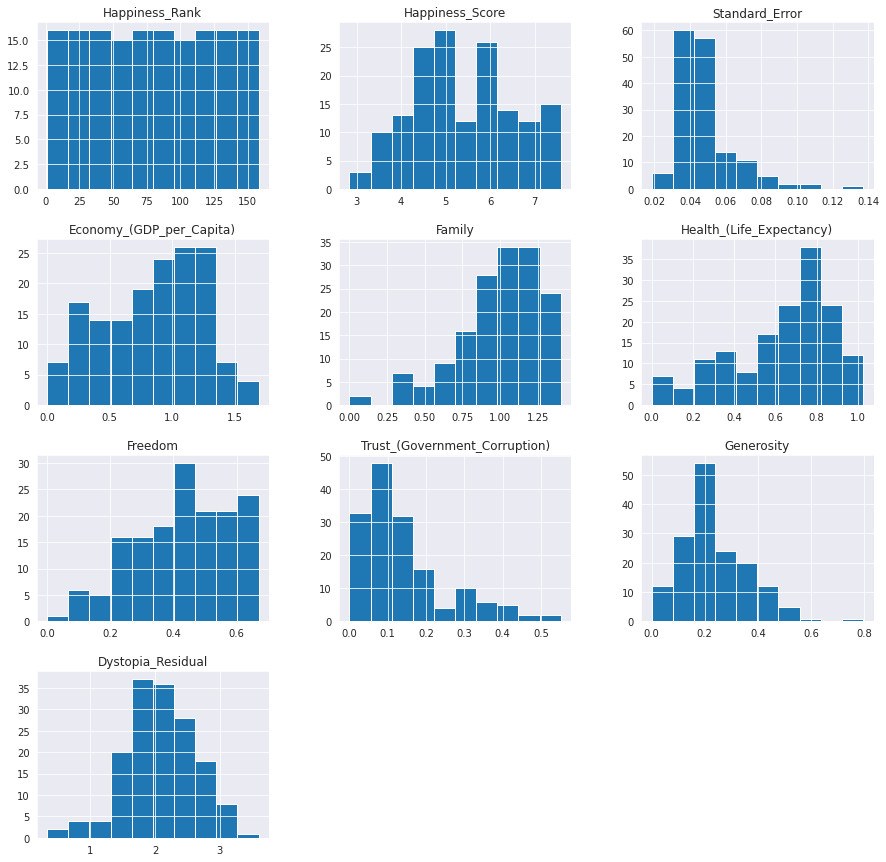

In [10]:
data_2015.hist(figsize=(15,15))
plt.show()

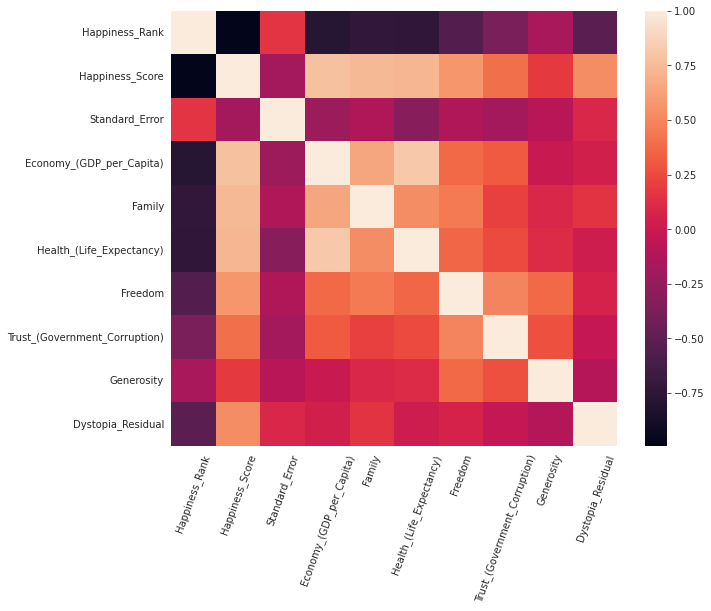

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data_2015.corr())
plt.xticks(rotation=70)
plt.show()

<Figure size 1080x1080 with 0 Axes>

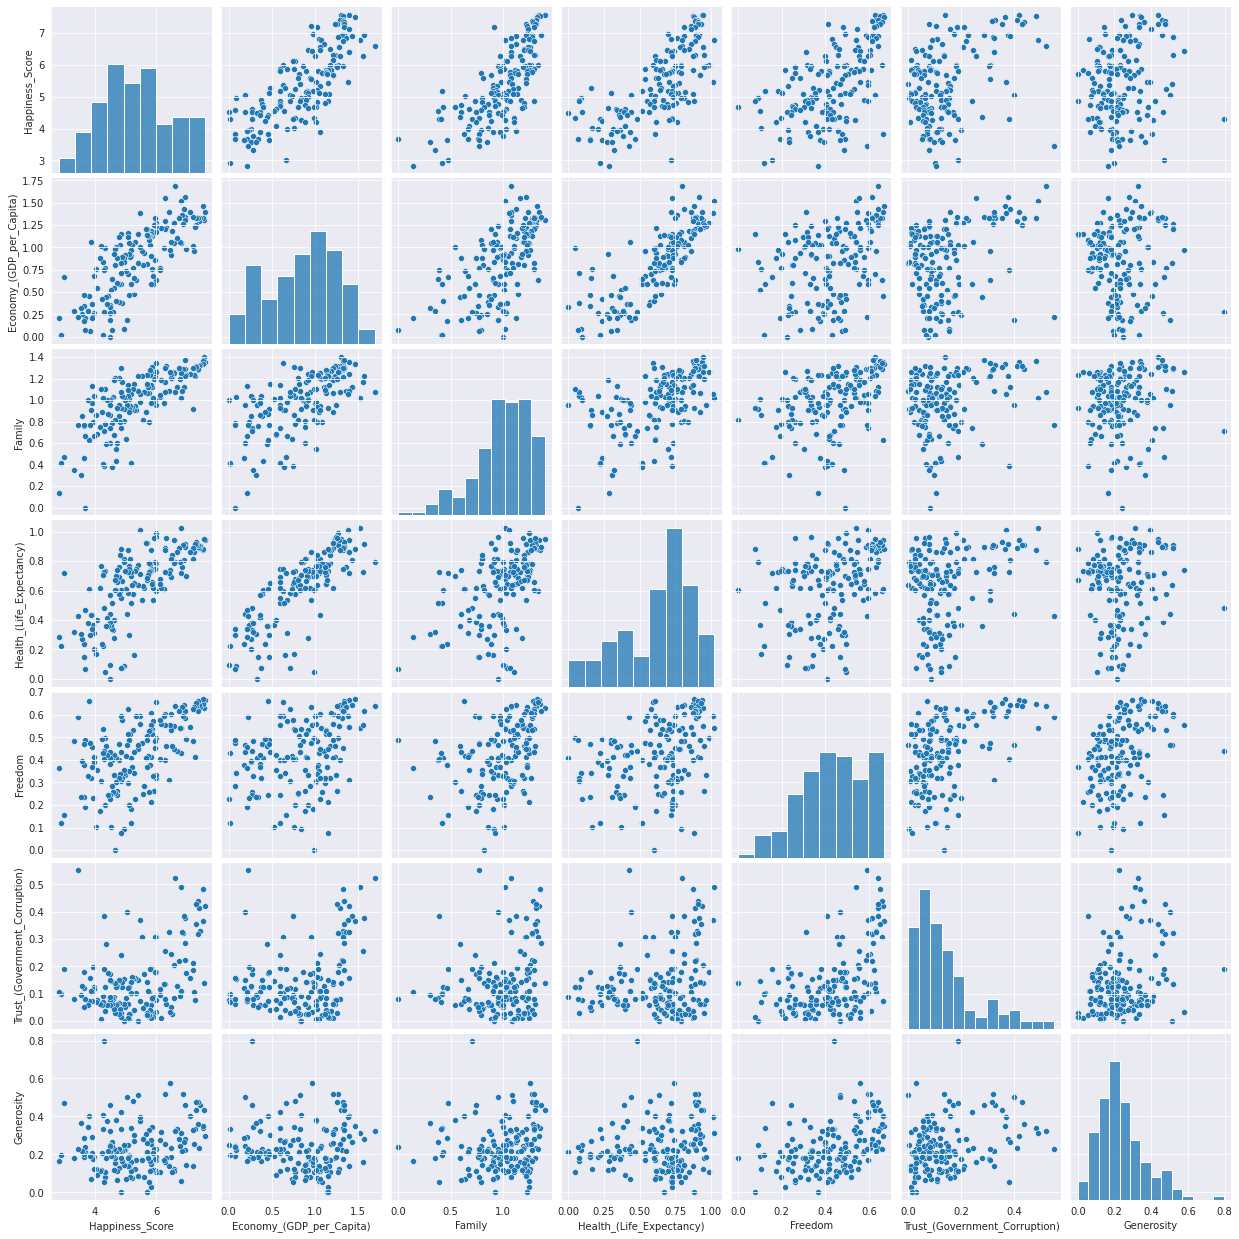

In [12]:
plt.figure(figsize=(15,15))
sns.pairplot(data_2015.loc[:,['Happiness_Score', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity']])
plt.show()

In [13]:
data_2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

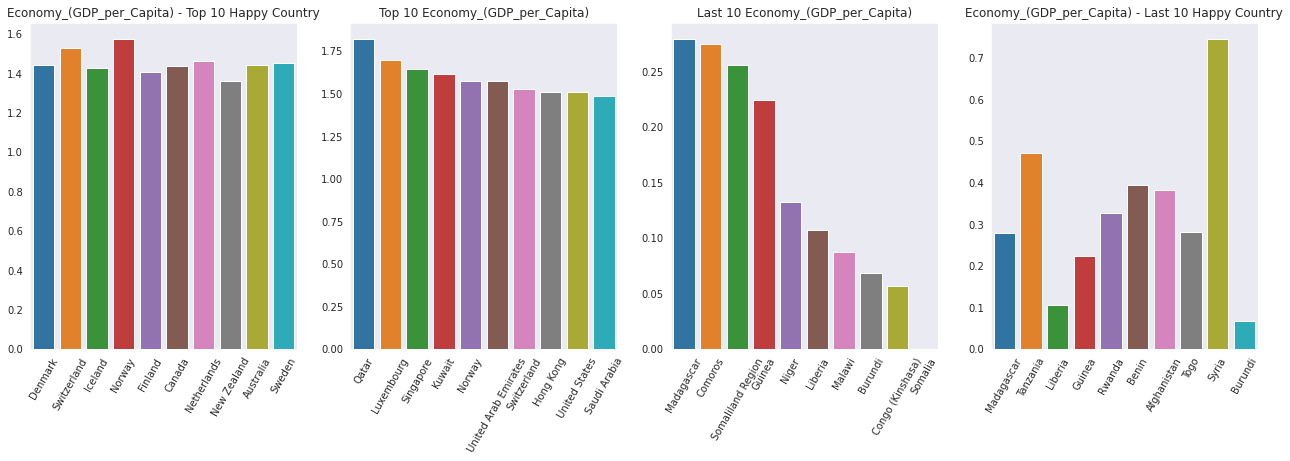

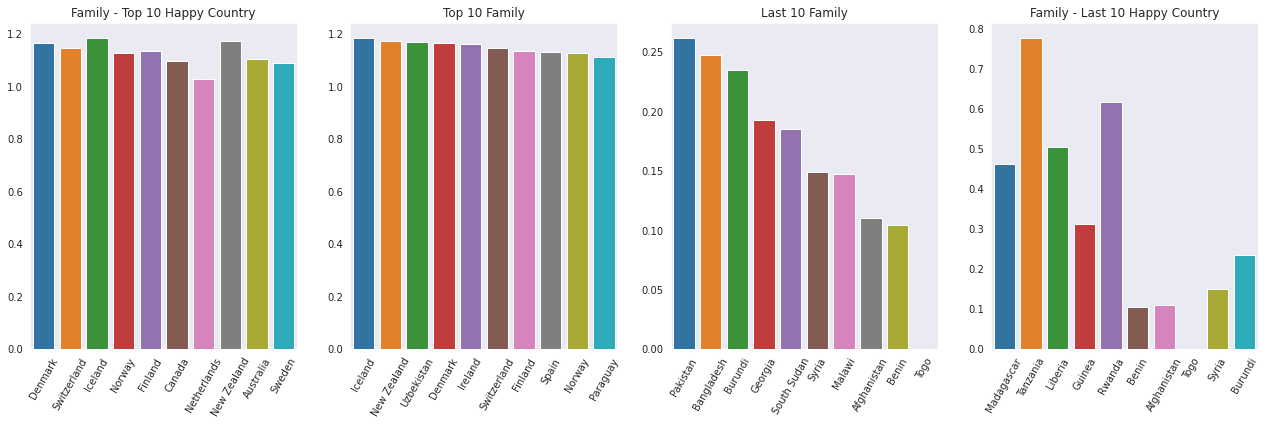

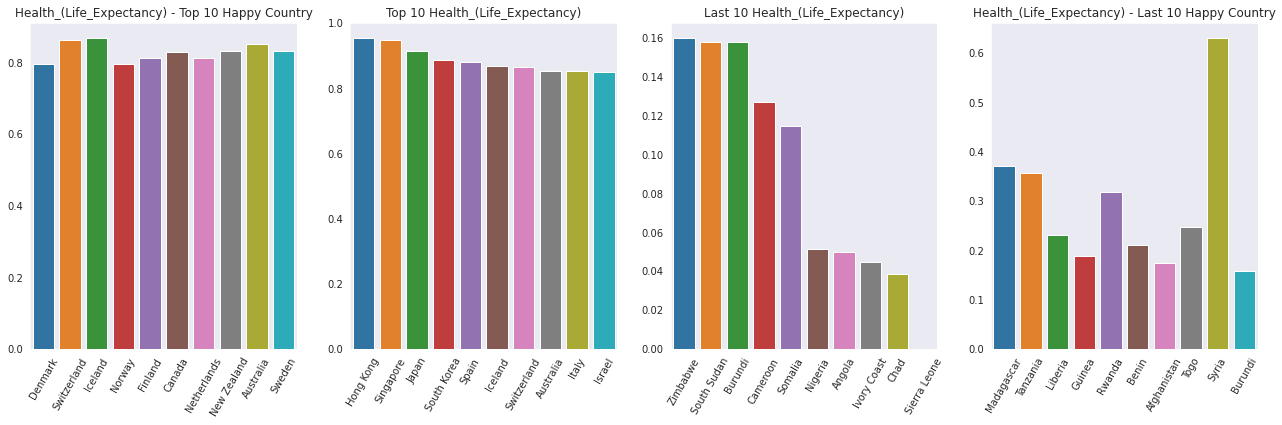

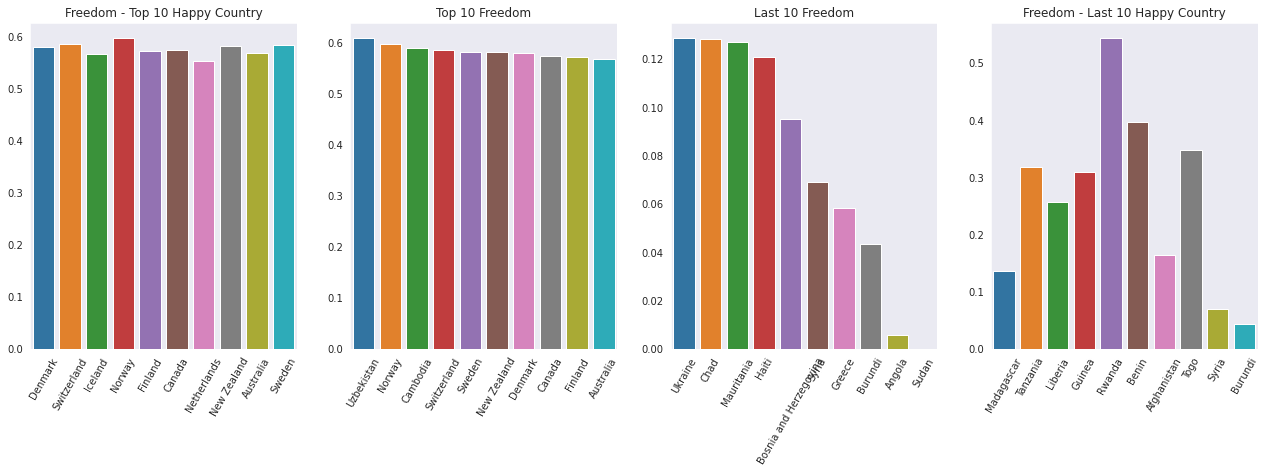

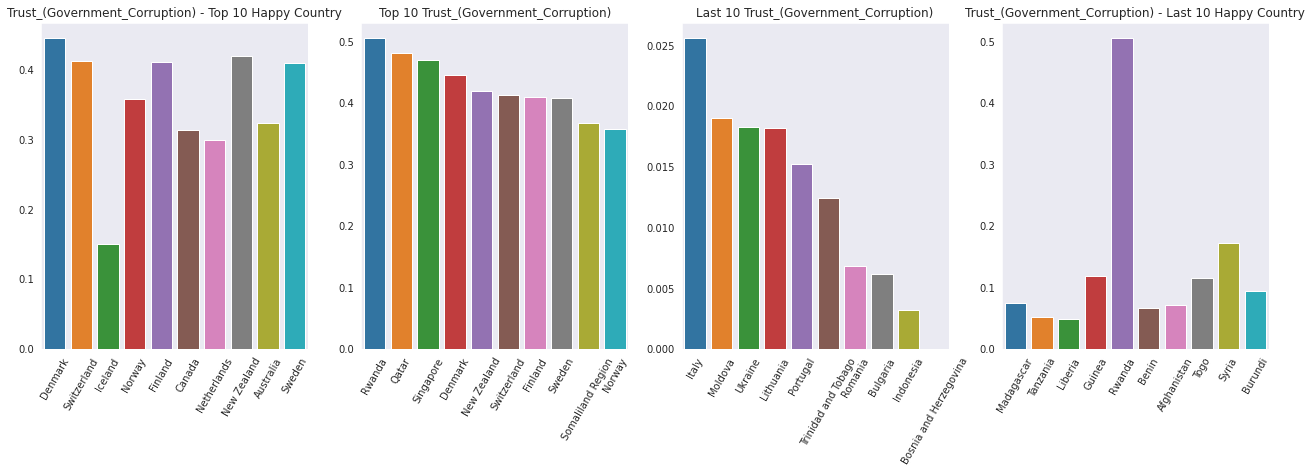

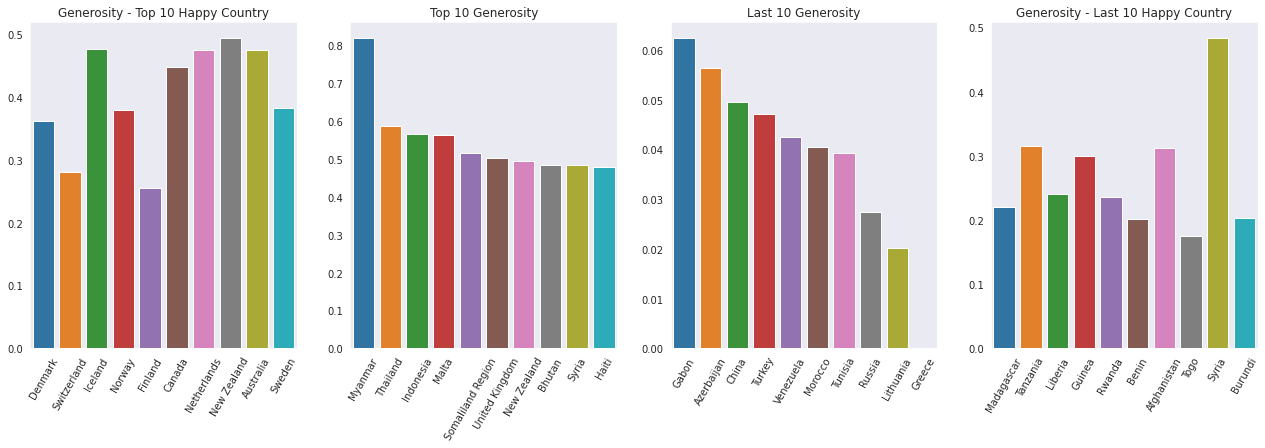

In [14]:
numeric_features = ["Economy_(GDP_per_Capita)", "Family",
                    "Health_(Life_Expectancy)", "Freedom", "Trust_(Government_Corruption)",
                   "Generosity"]

for feature in numeric_features:
    plt.figure(figsize=(22, 6))
    
    plt.subplot(1, 4, 1)
    plt.title(f"{feature} - Top 10 Happy Country")
    sns.barplot(data=data_2016.head(10), x="Country", y=feature)
    plt.grid(False)
    plt.xticks(rotation=60)
    plt.ylabel(None)
    plt.xlabel(None)
    
    plt.subplot(1, 4, 2)
    plt.title(f"Top 10 {feature}")
    sns.barplot(data=data_2016.sort_values(by=feature, ascending=False).head(10), x="Country", y=feature)
    plt.grid(False)
    plt.xticks(rotation=60)
    plt.ylabel(None)
    plt.xlabel(None)
    
    plt.subplot(1, 4, 3)
    plt.title(f"Last 10 {feature}")
    sns.barplot(data=data_2016.sort_values(by=feature, ascending=False).tail(10), x="Country", y=feature)
    plt.grid(False)
    plt.xticks(rotation=60)
    plt.ylabel(None)
    plt.xlabel(None)
    
    plt.subplot(1, 4, 4)
    plt.title(f"{feature} - Last 10 Happy Country")
    sns.barplot(data=data_2016.tail(10), x="Country", y=feature)
    plt.grid(False)
    plt.xticks(rotation=60)
    plt.ylabel(None)
    plt.xlabel(None)
    
    plt.show()

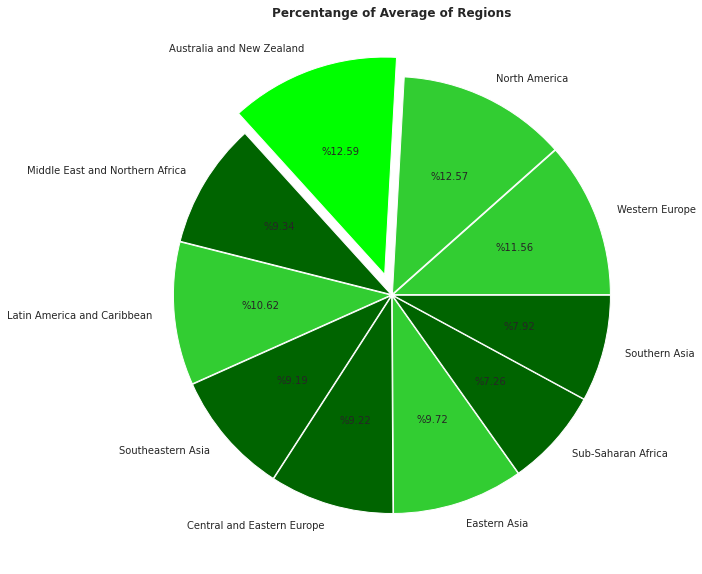

In [15]:
region_avg = {}
for var in data_2015.Region.unique():
    avgg = data_2015[data_2015.Region == var].Happiness_Score.mean()
    region_avg[var] = avgg
    
regions = list(region_avg.keys())
avg_happiness = list(region_avg.values())

plt.figure(figsize=(10, 10))

colors = ["lime" if i==max(avg_happiness) else "limegreen" if i > 5.5 else "darkgreen" for i in avg_happiness]
plt.pie(avg_happiness, labels=regions, autopct="%%%.2f",
        explode=[.1 if avg == max(avg_happiness) else .005
                 for avg in list(region_avg.values())],
       colors=colors)
plt.title("Percentange of Average of Regions", weight="bold")

plt.show()

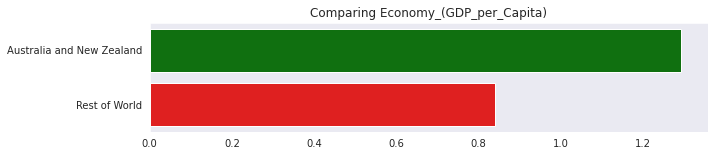

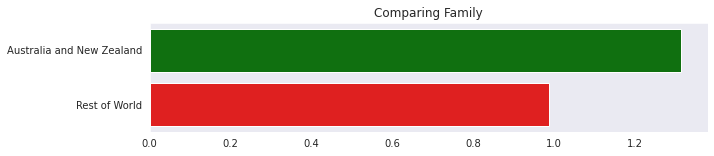

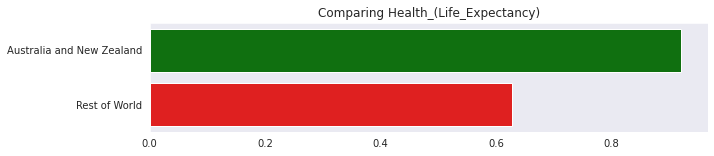

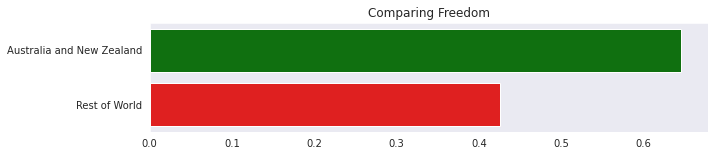

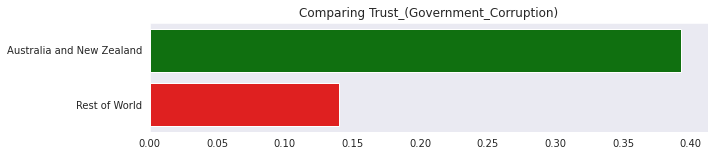

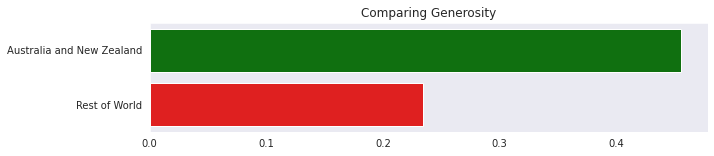

In [16]:
numeric_features = ["Economy_(GDP_per_Capita)", "Family",
                    "Health_(Life_Expectancy)", "Freedom", "Trust_(Government_Corruption)",
                   "Generosity"]

for feature in numeric_features:
    aust_and_new_zeland_avg = data_2015[data_2015.Region == "Australia and New Zealand"][feature].mean()
    rest_of_world_avg = data_2015[data_2015.Region != "Australia and New Zealand"][feature].mean()
    
    plt.figure(figsize=(10, 2))
    plt.grid(False)
    sns.barplot(x=[aust_and_new_zeland_avg, rest_of_world_avg], 
               y=["Australia and New Zealand", "Rest of World"],
               palette = ["green","red" if aust_and_new_zeland_avg > rest_of_world_avg else "red","green"])
    plt.title(f"Comparing {feature}")
    plt.show()
    
    
    

In [17]:
data_2019.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

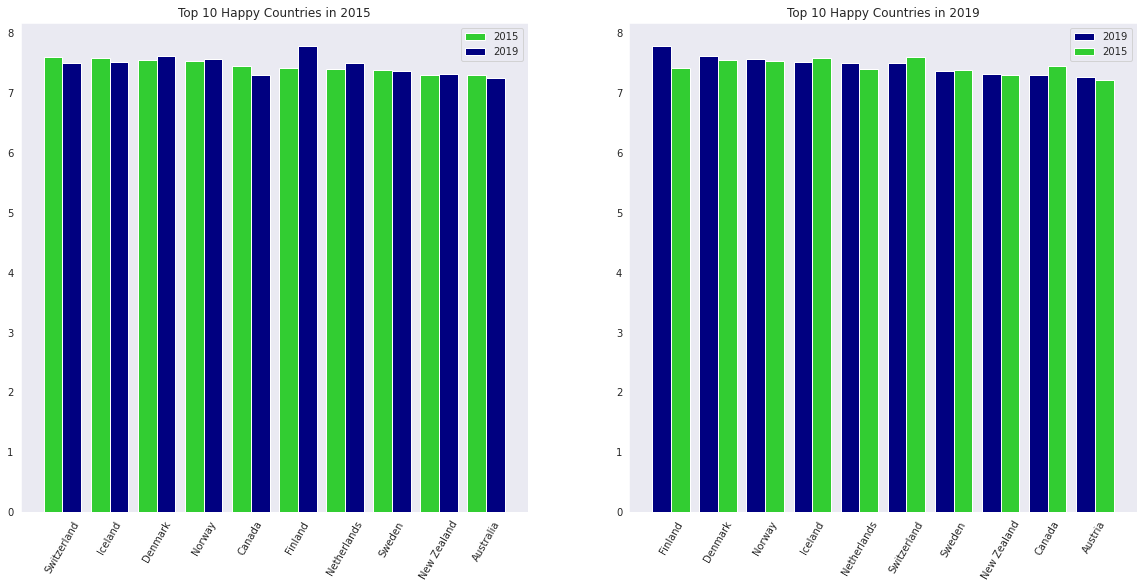

In [18]:

most_happy_countries_2015 = data_2015.Country.head(10)
x = np.arange(10)
width = .4
plt.figure(figsize=(20, 9))
    
plt.subplot(1, 2, 1)
plt.grid(False)
plt.bar(x-.2, data_2015.Happiness_Score.head(10), width, label="2015", color="limegreen")
plt.bar(x+.2, data_2019.set_index("Country_or_region").loc[most_happy_countries_2015,"Score"],
        width, label="2019", color="navy")
plt.xticks(x, most_happy_countries_2015, rotation=60)
plt.title("Top 10 Happy Countries in 2015")
plt.legend()


most_happy_countries_2019 = data_2019.Country_or_region.head(10)

plt.subplot(1, 2, 2)
plt.grid(False)
plt.bar(x-.2, data_2019.Score.head(10), width, label="2019", color="navy")
plt.bar(x+.2, data_2015.set_index("Country").loc[most_happy_countries_2019,"Happiness_Score"],
        width, label="2015", color="limegreen")

plt.xticks(x, most_happy_countries_2019, rotation=60)
plt.title("Top 10 Happy Countries in 2019")
plt.legend()
    
plt.show()

In [19]:
happiness_change = {}
for country in data_2015.Country:
    try:
        happiness_2015 = data_2015.set_index("Country").loc[country, "Happiness_Score"]
        happiness_2019 = data_2019.set_index("Country_or_region").loc[country, "Score"]
        change = happiness_2019 - happiness_2015
        happiness_change[country] = change
    except:
        continue

In [20]:
top_10_changed_countries = [x for x in zip(list(happiness_change.keys()), list(happiness_change.values()))]
top_10_changed_countries.sort(key=lambda x: -abs(x[1]))
top_10_changed_countries =  top_10_changed_countries[:10]
top_10_changed_countries

[('Venezuela', -2.1029999999999998),
 ('Benin', 1.5430000000000001),
 ('Ivory Coast', 1.2890000000000001),
 ('Togo', 1.246),
 ('Lesotho', -1.0959999999999996),
 ('Honduras', 1.072),
 ('Zambia', -1.0219999999999994),
 ('Burkina Faso', 0.9999999999999996),
 ('Hungary', 0.9580000000000002),
 ('Zimbabwe', -0.9470000000000005)]

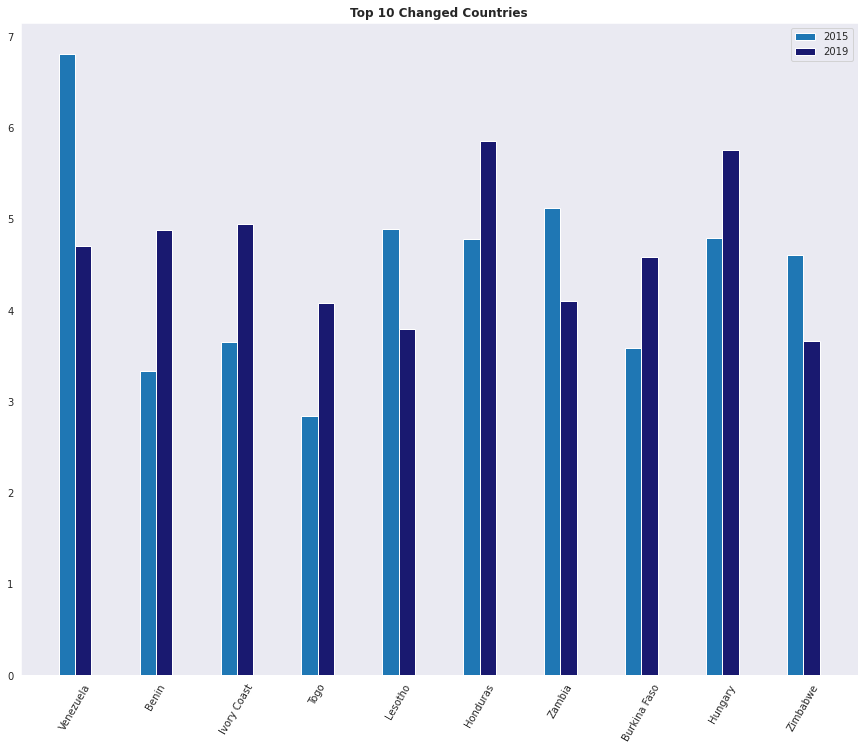

In [21]:
countries = [each[0] for each in top_10_changed_countries]
scores_2019 = [data_2019.set_index("Country_or_region").loc[country,"Score"] for country in countries]
scores_2015 = [data_2015.set_index("Country").loc[country,"Happiness_Score"] for country in countries]


plt.figure(figsize=(15, 12))
plt.grid(False)

x = np.arange(10)
width = .2

plt.bar(x-.1, scores_2015, width, label="2015")
plt.bar(x+.1, scores_2019, width, label="2019", color="midnightblue")

plt.legend()
plt.xticks(x, countries, rotation=60)
plt.title("Top 10 Changed Countries", weight="bold")
plt.show()